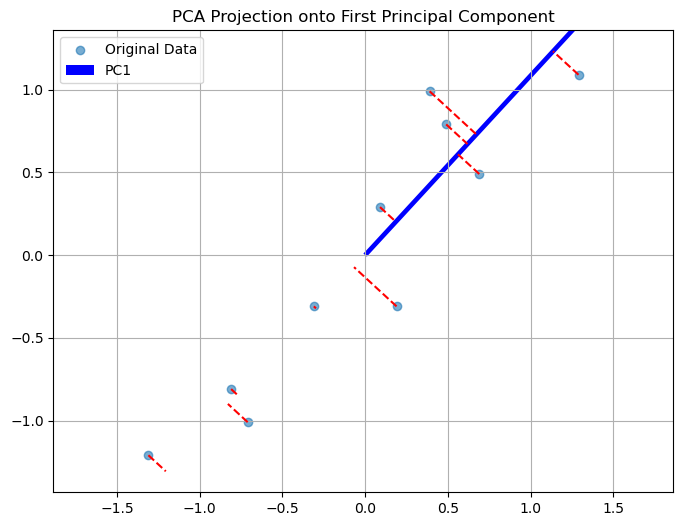

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create 2D dataset
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2.0, 1.6],
              [1.0, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# Step 2: Center the data
X_meaned = X - np.mean(X, axis=0)

# Step3: Covariance matrix
cov_mat = np.cov(X_meaned, rowvar=False)

# Step 4: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)

# Step 5: Sort eigenvectors by eigenvalues (descending)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvalues = eigenvalues[sorted_indices]

# Step 6: Project data onto the top 1 principal component
k = 1    # number of principal components
W = eigenvectors[:, :k]
X_reduced = X_meaned @ W

# Step 7: Plot original vs reduced
plt.figure(figsize=(8, 6))
plt.scatter(X_meaned[:, 0], X_meaned[:, 1], alpha = 0.6, label='Original Data')
for i in range(len(X_reduced)):
    projected = X_reduced[i] * W.T
    plt.plot([X_meaned[i, 0], projected[0, 0]],
             [X_meaned[i, 1], projected[0, 1]], 'r--')

plt.quiver(0, 0, W[0, 0], W[1, 0], color='blue', scale=1, label='PC1')
plt.axis('equal')
plt.title("PCA Projection onto First Principal Component")
plt.legend()
plt.grid(True)
plt.show()




